In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import date, timedelta

In [2]:
casedf = pd.read_csv("cases_malaysia.csv") 

In [3]:
casedf.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,2020-01-25,4,4,0,4,0,4,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-26,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-27,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-28,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-29,3,3,0,7,0,3,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
deathdf = pd.read_csv("deaths_malaysia.csv") 

In [5]:
deathdf.head()

,date,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,deaths_tat
0,2020-03-17,2,0,2,0,2,0,0,0,0
1,2020-03-18,0,0,0,0,0,0,0,0,0
2,2020-03-19,0,0,0,0,0,0,0,0,0
3,2020-03-20,1,0,1,0,1,0,0,0,0
4,2020-03-21,4,0,4,0,4,0,0,0,0


In [6]:
casedeathdf = pd.merge(casedf,deathdf, on=['date'], how='left')

In [7]:
casedeathdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 0 to 960
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     961 non-null    object 
 1   cases_new                961 non-null    int64  
 2   cases_import             961 non-null    int64  
 3   cases_recovered          961 non-null    int64  
 4   cases_active             961 non-null    int64  
 5   cases_cluster            961 non-null    int64  
 6   cases_unvax              961 non-null    int64  
 7   cases_pvax               961 non-null    int64  
 8   cases_fvax               961 non-null    int64  
 9   cases_boost              961 non-null    int64  
 10  cases_child              961 non-null    int64  
 11  cases_adolescent         961 non-null    int64  
 12  cases_adult              961 non-null    int64  
 13  cases_elderly            961 non-null    int64  
 14  cases_0_4                9

In [8]:
# Number of missing values in each column in the dataframe
casedeathdf.isnull().sum()

date                         0
cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
deaths_new                  52
deaths_b

In [9]:
#fill in null values in NaN fields with 0
casedeathdf.fillna(0, inplace = True)

In [10]:
casedeathdf.isnull().sum()

date                       0
cases_new                  0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
deaths_new                 0
deaths_bid                 0
deaths_new_dod             0
deaths_bid_dod

### Drop column that may not provide any information gain

In [11]:
###Drop these field as will split under age category
# cases_import             961 non-null    int64  
# cases_recovered          961 non-null    int64  
# cases_active             961 non-null    int64  
# cases_cluster            961 non-null    int64  

# cases_child       15376 non-null  int64  
# cases_adolescent  15376 non-null  int64  
# cases_adult       15376 non-null  int64  
# cases_elderly     15376 non-null  int64  

# deaths_bid        14544 non-null  float64
# deaths_new_dod    14544 non-null  float64
# deaths_bid_dod    14544 non-null  float64
# deaths_tat        14544 non-null  float64

# cases_0_4                961 non-null    int64  
# cases_5_11               961 non-null    int64  
# cases_12_17              961 non-null    int64  
# cases_18_29              961 non-null    int64  
# cases_30_39              961 non-null    int64  
# cases_40_49              961 non-null    int64  
# cases_50_59              961 non-null    int64  
# cases_60_69              961 non-null    int64  
# cases_70_79              961 non-null    int64  
# cases_80                 961 non-null    int64  

# cluster_import           619 non-null    float64
# cluster_religious        619 non-null    float64
# cluster_community        619 non-null    float64
# cluster_highRisk         619 non-null    float64
# cluster_education        619 non-null    float64
# cluster_detentionCentre  619 non-null    float64
# cluster_workplace        619 non-null    float64


In [12]:
casedeathdf.drop(['cases_import','cases_recovered','cases_active', 'cases_cluster', 'cases_0_4', 
             'cases_5_11', 'cases_12_17', 'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59',
              'cases_60_69','cases_70_79','cases_80'   ], axis = 1, inplace=True)

In [13]:
casedeathdf.drop(['cluster_import','cluster_religious','cluster_community', 'cluster_highRisk', 'cluster_education', 
             'cluster_detentionCentre', 'cluster_workplace' ], axis = 1, inplace=True)

In [14]:
casedeathdf.drop(['cases_child','cases_adolescent','cases_adult', 'cases_elderly', 'deaths_bid', 
             'deaths_new_dod', 'deaths_bid_dod', 'deaths_tat'], axis = 1, inplace=True)

In [15]:
# Obtain vaccine information
vaxdf = pd.read_csv("vax_malaysia.csv") 

In [16]:
# Obtain vaccine percentage base on total population
population = pd.read_csv("population.csv") 

#Since this was using the full Malaysia data, so the population will be set as 32657100

In [17]:
population

,state,idxs,pop,pop_18,pop_60,pop_12,pop_5
0,Malaysia,0,32657100,23528200,3649000,3111400,3550500
1,Klang Valley,17,8417800,6181800,827600,719000,895100
2,Johor,1,3794200,2733400,445600,353900,409800
3,Kedah,2,2193600,1554800,282300,209700,254100
4,Kelantan,3,1928900,1258700,202100,211200,271700
5,Melaka,4,937800,683700,123200,85600,98200
6,Negeri Sembilan,5,1128900,819200,150300,105900,117200
7,Pahang,6,1684700,1188000,198100,172000,192600
8,Perak,8,2509000,1878100,410000,228000,239700
9,Perlis,9,255500,182100,36300,23000,29100


In [18]:
vaxdf.head(50)

,date,daily_partial,daily_full,daily_booster,daily_booster2,daily,daily_partial_adol,daily_full_adol,daily_booster_adol,daily_booster2_adol,...,sinopharm2,sinopharm3,sinopharm4,cansino,cansino3,cansino4,pending1,pending2,pending3,pending4
0,2021-02-24,66,3,0,0,69,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2021-02-25,1149,2,0,0,1151,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
2,2021-02-26,4103,3,0,0,4106,0,0,0,0,...,0,0,0,0,0,0,7,0,0,0
3,2021-02-27,6721,6,0,0,6727,0,0,0,0,...,0,0,0,0,0,0,21,0,0,0
4,2021-02-28,6719,6,0,0,6725,0,1,0,0,...,0,0,0,0,0,0,4,0,0,0
5,2021-03-01,15395,6,0,0,15401,1,0,0,0,...,0,0,0,0,0,0,6,0,0,0
6,2021-03-02,21687,4,0,0,21691,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,2021-03-03,22691,6,0,0,22697,0,0,0,0,...,0,0,0,0,0,0,5,0,0,0
8,2021-03-04,19513,17,0,0,19530,0,0,0,0,...,0,0,0,0,0,0,4,3,0,0
9,2021-03-05,14372,6,0,0,14378,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0


In [19]:
vaxdf['total_partial'] = vaxdf['daily_partial'].cumsum()
vaxdf['total_full'] = vaxdf['daily_full'].cumsum()
vaxdf['total_booster'] = vaxdf['daily_booster'].cumsum()
vaxdf['total_booster2'] = vaxdf['daily_booster2'].cumsum()

In [20]:
vaxdf['total_partial_per'] = (vaxdf['total_partial']/32657100)*100
vaxdf['total_full_per'] = (vaxdf['total_full']/32657100)*100
vaxdf['total_booster_per'] = (vaxdf['total_booster']/32657100)*100
vaxdf['total_booster2_per'] = (vaxdf['total_booster2']/32657100)*100

In [21]:
vaxdf.tail()

,date,daily_partial,daily_full,daily_booster,daily_booster2,daily,daily_partial_adol,daily_full_adol,daily_booster_adol,daily_booster2_adol,...,pending3,pending4,total_partial,total_full,total_booster,total_booster2,total_partial_per,total_full_per,total_booster_per,total_booster2_per
560,2022-09-07,617,290,717,1519,3143,16,34,39,1,...,0,0,27878059,27498442,16222893,477370,85.365997,84.203564,49.676465,1.461765
561,2022-09-08,406,441,934,2767,4548,33,40,60,8,...,6,23,27878465,27498883,16223827,480137,85.367240,84.204914,49.679325,1.470238
562,2022-09-09,458,808,664,2124,4054,23,42,38,0,...,0,0,27878923,27499691,16224491,482261,85.368643,84.207388,49.681359,1.476742
563,2022-09-10,311,637,336,1102,2386,14,26,23,0,...,0,0,27879234,27500328,16224827,483363,85.369595,84.209339,49.682388,1.480116
564,2022-09-11,127,341,257,598,1323,5,13,12,1,...,0,0,27879361,27500669,16225084,483961,85.369984,84.210383,49.683175,1.481947


In [22]:
vaxdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  565 non-null    object 
 1   daily_partial         565 non-null    int64  
 2   daily_full            565 non-null    int64  
 3   daily_booster         565 non-null    int64  
 4   daily_booster2        565 non-null    int64  
 5   daily                 565 non-null    int64  
 6   daily_partial_adol    565 non-null    int64  
 7   daily_full_adol       565 non-null    int64  
 8   daily_booster_adol    565 non-null    int64  
 9   daily_booster2_adol   565 non-null    int64  
 10  daily_partial_child   565 non-null    int64  
 11  daily_full_child      565 non-null    int64  
 12  daily_booster_child   565 non-null    int64  
 13  daily_booster2_child  565 non-null    int64  
 14  cumul_partial         565 non-null    int64  
 15  cumul_full            5

In [23]:
vaxdf1 = vaxdf[["date", "total_partial_per","total_full_per","total_booster_per","total_booster2_per"]]

In [24]:
vaxdf1

,date,total_partial_per,total_full_per,total_booster_per,total_booster2_per
0,2021-02-24,0.000202,0.000009,0.000000,0.000000
1,2021-02-25,0.003720,0.000015,0.000000,0.000000
2,2021-02-26,0.016284,0.000024,0.000000,0.000000
3,2021-02-27,0.036865,0.000043,0.000000,0.000000
4,2021-02-28,0.057439,0.000061,0.000000,0.000000
...,...,...,...,...,...
560,2022-09-07,85.365997,84.203564,49.676465,1.461765
561,2022-09-08,85.367240,84.204914,49.679325,1.470238
562,2022-09-09,85.368643,84.207388,49.681359,1.476742
563,2022-09-10,85.369595,84.209339,49.682388,1.480116


In [25]:
coviddf = pd.merge(casedeathdf,vaxdf1, on=['date'], how='left')

In [26]:
coviddf.head()

,date,cases_new,cases_unvax,cases_pvax,cases_fvax,cases_boost,deaths_new,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,total_partial_per,total_full_per,total_booster_per,total_booster2_per
0,2020-01-25,4,4,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2020-01-26,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2020-01-27,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2020-01-28,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2020-01-29,3,3,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [27]:
#fill in null values in NaN fields with 0
coviddf.fillna(0, inplace = True)

In [28]:
coviddf.isnull().sum()

date                  0
cases_new             0
cases_unvax           0
cases_pvax            0
cases_fvax            0
cases_boost           0
deaths_new            0
deaths_unvax          0
deaths_pvax           0
deaths_fvax           0
deaths_boost          0
total_partial_per     0
total_full_per        0
total_booster_per     0
total_booster2_per    0
dtype: int64

In [29]:
#Introduct new field => case_next_day

coviddf['cases_next_day'] = coviddf['cases_new'].shift(-1)

In [30]:
coviddf.head()

,date,cases_new,cases_unvax,cases_pvax,cases_fvax,cases_boost,deaths_new,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,total_partial_per,total_full_per,total_booster_per,total_booster2_per,cases_next_day
0,2020-01-25,4,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-26,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-27,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-28,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,2020-01-29,3,3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


NameError: name 'coviddf2' is not defined

In [ ]:
sorted_importance = coviddf.corr()["cases_next_day"].abs().sort_values(ascending=False)
sorted_importance

In [32]:
coviddf2 = coviddf

In [33]:
# Remove last row because it was not contain the cases_next_day value yet
coviddf2 = coviddf2[:-1]

In [35]:
coviddf2.tail()

,date,cases_new,cases_unvax,cases_pvax,cases_fvax,cases_boost,deaths_new,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,total_partial_per,total_full_per,total_booster_per,total_booster2_per,cases_next_day
955,2022-09-06,2067,188,8,423,1448,6.0,1.0,1.0,1.0,3.0,85.364108,84.202676,49.674270,1.457113,2428.0
956,2022-09-07,2428,208,11,474,1735,7.0,3.0,0.0,1.0,3.0,85.365997,84.203564,49.676465,1.461765,2226.0
957,2022-09-08,2226,209,12,409,1596,8.0,0.0,0.0,0.0,0.0,85.367240,84.204914,49.679325,1.470238,1990.0
958,2022-09-09,1990,185,9,369,1427,4.0,0.0,0.0,0.0,1.0,85.368643,84.207388,49.681359,1.476742,1971.0
959,2022-09-10,1971,217,13,352,1389,3.0,0.0,0.0,0.0,0.0,85.369595,84.209339,49.682388,1.480116,1483.0


In [36]:
print(coviddf[coviddf['cases_new'] == 0])

          date  cases_new  cases_unvax  cases_pvax  cases_fvax  cases_boost  \
1   2020-01-26          0            0           0           0            0   
2   2020-01-27          0            0           0           0            0   
3   2020-01-28          0            0           0           0            0   
6   2020-01-31          0            0           0           0            0   
7   2020-02-01          0            0           0           0            0   
8   2020-02-02          0            0           0           0            0   
9   2020-02-03          0            0           0           0            0   
17  2020-02-11          0            0           0           0            0   
18  2020-02-12          0            0           0           0            0   
19  2020-02-13          0            0           0           0            0   
22  2020-02-16          0            0           0           0            0   
23  2020-02-17          0            0           0  

In [38]:
coviddf2['date'] = pd.to_datetime(coviddf2['date'], format='%Y-%m-%d')

C:\Users\User\AppData\Local\Temp/ipykernel_31852/717875835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coviddf2['date'] = pd.to_datetime(coviddf2['date'], format='%Y-%m-%d')


In [39]:
coviddf2

,date,cases_new,cases_unvax,cases_pvax,cases_fvax,cases_boost,deaths_new,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,total_partial_per,total_full_per,total_booster_per,total_booster2_per,cases_next_day
0,2020-01-25,4,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,2020-01-26,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,2020-01-27,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,2020-01-28,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.0
4,2020-01-29,3,3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2022-09-06,2067,188,8,423,1448,6.0,1.0,1.0,1.0,3.0,85.364108,84.202676,49.674270,1.457113,2428.0
956,2022-09-07,2428,208,11,474,1735,7.0,3.0,0.0,1.0,3.0,85.365997,84.203564,49.676465,1.461765,2226.0
957,2022-09-08,2226,209,12,409,1596,8.0,0.0,0.0,0.0,0.0,85.367240,84.204914,49.679325,1.470238,1990.0
958,2022-09-09,1990,185,9,369,1427,4.0,0.0,0.0,0.0,1.0,85.368643,84.207388,49.681359,1.476742,1971.0


In [49]:
coviddf3 = coviddf2[(coviddf2['date'] > '2020-03-02')]

In [50]:
coviddf3

,date,cases_new,cases_unvax,cases_pvax,cases_fvax,cases_boost,deaths_new,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,total_partial_per,total_full_per,total_booster_per,total_booster2_per,cases_next_day
38,2020-03-03,7,7,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,14.0
39,2020-03-04,14,14,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,5.0
40,2020-03-05,5,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,28.0
41,2020-03-06,28,28,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,10.0
42,2020-03-07,10,10,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2022-09-06,2067,188,8,423,1448,6.0,1.0,1.0,1.0,3.0,85.364108,84.202676,49.674270,1.457113,2428.0
956,2022-09-07,2428,208,11,474,1735,7.0,3.0,0.0,1.0,3.0,85.365997,84.203564,49.676465,1.461765,2226.0
957,2022-09-08,2226,209,12,409,1596,8.0,0.0,0.0,0.0,0.0,85.367240,84.204914,49.679325,1.470238,1990.0
958,2022-09-09,1990,185,9,369,1427,4.0,0.0,0.0,0.0,1.0,85.368643,84.207388,49.681359,1.476742,1971.0


In [51]:
print(coviddf3[coviddf3['cases_new'] == 0])

Empty DataFrame
Columns: [date, cases_new, cases_unvax, cases_pvax, cases_fvax, cases_boost, deaths_new, deaths_unvax, deaths_pvax, deaths_fvax, deaths_boost, total_partial_per, total_full_per, total_booster_per, total_booster2_per, cases_next_day]
Index: []


In [52]:
sorted_importance = coviddf3.corr()["cases_next_day"].abs().sort_values(ascending=False)
sorted_importance

cases_next_day        1.000000
cases_new             0.990606
cases_fvax            0.819508
cases_unvax           0.714078
deaths_fvax           0.713538
deaths_new            0.660271
cases_boost           0.653275
cases_pvax            0.627697
deaths_unvax          0.599497
deaths_boost          0.568189
deaths_pvax           0.545556
total_partial_per     0.467175
total_full_per        0.395377
total_booster_per     0.240245
total_booster2_per    0.050609
Name: cases_next_day, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [54]:
# Train test split
X = coviddf3.drop(['date','cases_next_day'],axis=1)
y = coviddf3['cases_next_day']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle = False )

In [77]:
X_train.shape

(737, 14)

In [56]:
X_test.shape

(185, 14)

In [57]:
linreg = LinearRegression()
decreg = DecisionTreeRegressor()

In [58]:
#Linear Regression model
linreg.fit(X_train, y_train)
preds_lin = linreg.predict(X_test)

In [59]:
decreg.fit(X_train,y_train)
preds_dec = decreg.predict(X_test)

In [60]:
#overfitted model
preds_train_dec = decreg.predict(X_train)
r2_score(y_train,preds_train_dec)

0.9999983153605174

In [61]:
r2_score(y_test,preds_lin)

-0.13690565497756713

In [62]:
r2_score(y_test,preds_dec)

0.6207352409059965

In [63]:
decreg2 = DecisionTreeRegressor(max_depth= 5)
decreg3 = DecisionTreeRegressor(max_depth= 4)
decreg4 = DecisionTreeRegressor(max_depth= 3)

In [64]:
decreg2.fit(X_train,y_train)
preds_dec2 = decreg2.predict(X_test)

In [65]:
decreg3.fit(X_train,y_train)
preds_dec3 = decreg3.predict(X_test)

In [66]:
decreg4.fit(X_train,y_train)
preds_dec4 = decreg4.predict(X_test)

In [67]:
preds_train_dec2 = decreg2.predict(X_train)
r2_score(y_train,preds_train_dec2)

0.9926285083688868

In [68]:
preds_train_dec3 = decreg3.predict(X_train)
r2_score(y_train,preds_train_dec3)

0.9886021304520083

In [69]:
preds_train_dec4 = decreg4.predict(X_train)
r2_score(y_train,preds_train_dec4)

0.9753262615270121

In [79]:
r2_score(y_test,preds_dec2)

0.6763398472207189

In [82]:
r2_score(y_test,preds_dec3)

0.6672295921054914

In [81]:
r2_score(y_test,preds_dec4)

0.5922170663505348

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
train = coviddf[coviddf['date'] < pd.to_datetime("2022-08-01", format='%Y-%m-%d')]
test = coviddf[coviddf['date'] > pd.to_datetime("2022-08-01", format='%Y-%m-%d')]

Text(0.5, 1.0, 'Covid Cases Malaysia')

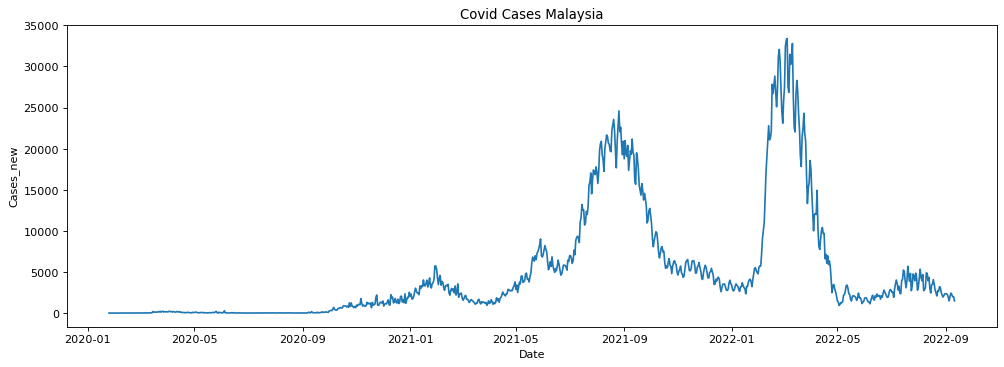

In [74]:
plt.figure(figsize=(15, 5), dpi=80)
plt.plot(coviddf['date'] , coviddf['cases_new'])
plt.ylabel('Cases_new')
plt.xlabel('Date')
plt.title("Covid Cases Malaysia")

In [84]:
# the best model: decreg2 => deploy this model
import pickle

filename = 'covid_predictor.pkl'
with open(filename, 'wb') as f:
    pickle.dump(decreg2, f)

In [85]:
#unpacking pickle
with open(filename, 'rb') as f:
    model = pickle.load(f)


In [100]:
print(coviddf3[coviddf3['date'] > '2022-09-01'])

          date  cases_new  cases_unvax  cases_pvax  cases_fvax  cases_boost  \
951 2022-09-02       2328          201          15         482         1630   
952 2022-09-03       2244          181          19         465         1579   
953 2022-09-04       1904          183           8         357         1356   
954 2022-09-05       1486          160           4         284         1038   
955 2022-09-06       2067          188           8         423         1448   
956 2022-09-07       2428          208          11         474         1735   
957 2022-09-08       2226          209          12         409         1596   
958 2022-09-09       1990          185           9         369         1427   
959 2022-09-10       1971          217          13         352         1389   

     deaths_new  deaths_unvax  deaths_pvax  deaths_fvax  deaths_boost  \
951         9.0           2.0          0.0          1.0           1.0   
952         9.0           0.0          0.0          1.0        

In [98]:
X_new = pd.DataFrame({
    'cases_new':[1971], 
    'cases_unvax': [217], 
    'cases_pvax': [13],
    'cases_fvax':[352],
    'cases_boost':[1389], 
    'deaths_new': [3], 
    'deaths_unvax': [0],
    'deaths_pvax':[0],
    'deaths_fvax':[0], 
    'deaths_boost': [0], 
    'total_partial_per': [85.369595],
    'total_full_per':[84.209339],
    'total_booster_per': [49.682388],
    'total_booster2_per':[1.480116]
    })
X_new

,cases_new,cases_unvax,cases_pvax,cases_fvax,cases_boost,deaths_new,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,total_partial_per,total_full_per,total_booster_per,total_booster2_per
0,1971,217,13,352,1389,3,0,0,0,0,85.369595,84.209339,49.682388,1.480116


In [99]:
model.predict(X_new)

array([2175.51612903])